In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Cleaning Data

In [68]:
# covid = pd.read_excel('src/covid.xlsx')

covid = pd.read_csv('src/covid.csv')

In [69]:
covid.head()

,Unnamed: 0,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [70]:
covid.columns

Index(['Unnamed: 0', 'iso_code', 'continent', 'location', 'date',
       'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths',
       'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccin

In [71]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85171 entries, 0 to 85170
Data columns (total 60 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Unnamed: 0                             85171 non-null  int64  
 1   iso_code                               85171 non-null  object 
 2   continent                              81060 non-null  object 
 3   location                               85171 non-null  object 
 4   date                                   85171 non-null  object 
 5   total_cases                            83072 non-null  float64
 6   new_cases                              83070 non-null  float64
 7   new_cases_smoothed                     82069 non-null  float64
 8   total_deaths                           73408 non-null  float64
 9   new_deaths                             73566 non-null  float64
 10  new_deaths_smoothed                    82069 non-null  float64
 11  to

In [72]:
# Jangan lupa

covid['date'] = pd.to_datetime(covid['date'])

In [73]:
df = covid[['continent', 'location', 'date', 'new_cases', 'new_deaths', 'new_tests', 'new_vaccinations',
    'population']]

df

,continent,location,date,new_cases,new_deaths,new_tests,new_vaccinations,population
0,Asia,Afghanistan,2020-02-24,1.0,NaN,NaN,NaN,38928341.0
1,Asia,Afghanistan,2020-02-25,0.0,NaN,NaN,NaN,38928341.0
2,Asia,Afghanistan,2020-02-26,0.0,NaN,NaN,NaN,38928341.0
3,Asia,Afghanistan,2020-02-27,0.0,NaN,NaN,NaN,38928341.0
4,Asia,Afghanistan,2020-02-28,0.0,NaN,NaN,NaN,38928341.0
...,...,...,...,...,...,...,...,...
85166,Africa,Zimbabwe,2021-04-26,16.0,3.0,1495.0,21592.0,14862927.0
85167,Africa,Zimbabwe,2021-04-27,62.0,5.0,2355.0,22329.0,14862927.0
85168,Africa,Zimbabwe,2021-04-28,27.0,0.0,2025.0,24074.0,14862927.0
85169,Africa,Zimbabwe,2021-04-29,44.0,2.0,NaN,19584.0,14862927.0


In [74]:
df.fillna(0, inplace=True)

C:\Users\muhih\AppData\Local\Temp\ipykernel_22160\4231983114.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(0, inplace=True)


In [75]:
df['total_cases'] = df.sort_values('date').groupby('location')['new_cases'].cumsum()
df['total_deaths'] = df.sort_values('date').groupby('location')['new_deaths'].cumsum()
df['total_tests'] = df.sort_values('date').groupby('location')['new_tests'].cumsum()
df['total_vaccinations'] = df.sort_values('date').groupby('location')['new_vaccinations'].cumsum()

C:\Users\muhih\AppData\Local\Temp\ipykernel_22160\144714124.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_cases'] = df.sort_values('date').groupby('location')['new_cases'].cumsum()
C:\Users\muhih\AppData\Local\Temp\ipykernel_22160\144714124.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_deaths'] = df.sort_values('date').groupby('location')['new_deaths'].cumsum()
C:\Users\muhih\AppData\Local\Temp\ipykernel_22160\144714124.py:3: SettingWithCopyWarning: 
A value is trying to be s

In [76]:
df[(df['location'] == 'Indonesia') & (df['new_cases'] > 0)]

,continent,location,date,new_cases,new_deaths,new_tests,new_vaccinations,population,total_cases,total_deaths,total_tests,total_vaccinations
35478,Asia,Indonesia,2020-03-02,2.0,0.0,0.0,0.0,273523621.0,2.0,0.0,0.0,0.0
35482,Asia,Indonesia,2020-03-06,2.0,0.0,0.0,0.0,273523621.0,4.0,0.0,0.0,0.0
35484,Asia,Indonesia,2020-03-08,2.0,0.0,0.0,0.0,273523621.0,6.0,0.0,0.0,0.0
35485,Asia,Indonesia,2020-03-09,13.0,0.0,0.0,0.0,273523621.0,19.0,0.0,0.0,0.0
35486,Asia,Indonesia,2020-03-10,8.0,0.0,0.0,0.0,273523621.0,27.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
35898,Asia,Indonesia,2021-04-26,5944.0,177.0,36867.0,271909.0,273523621.0,1647138.0,44771.0,7051560.0,11116433.0
35899,Asia,Indonesia,2021-04-27,4656.0,168.0,51895.0,387563.0,273523621.0,1651794.0,44939.0,7103455.0,11503996.0
35900,Asia,Indonesia,2021-04-28,5241.0,177.0,41057.0,331026.0,273523621.0,1657035.0,45116.0,7144512.0,11835022.0
35901,Asia,Indonesia,2021-04-29,5833.0,218.0,55483.0,328726.0,273523621.0,1662868.0,45334.0,7199995.0,12163748.0


In [77]:
global_df = df[df['continent'] == 0]
global_df = global_df[~global_df['location'].isin(['European Union', 'International', 'World'])]

global_df.reset_index(inplace=True)
global_df.drop(columns={'continent', 'index'}, inplace=True)

global_df

,location,date,new_cases,new_deaths,new_tests,new_vaccinations,population,total_cases,total_deaths,total_tests,total_vaccinations
0,Africa,2020-02-13,0.0,0.0,0.0,0.0,1.340598e+09,0.0,0.0,0.0,0.0
1,Africa,2020-02-14,1.0,0.0,0.0,0.0,1.340598e+09,1.0,0.0,0.0,0.0
2,Africa,2020-02-15,0.0,0.0,0.0,0.0,1.340598e+09,1.0,0.0,0.0,0.0
3,Africa,2020-02-16,0.0,0.0,0.0,0.0,1.340598e+09,1.0,0.0,0.0,0.0
4,Africa,2020-02-17,0.0,0.0,0.0,0.0,1.340598e+09,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2728,South America,2021-04-26,81311.0,2789.0,0.0,1360561.0,4.307598e+08,24325791.0,653917.0,0.0,70071494.0
2729,South America,2021-04-27,127984.0,4366.0,0.0,1855167.0,4.307598e+08,24453775.0,658283.0,0.0,71926661.0
2730,South America,2021-04-28,153470.0,5065.0,0.0,1424625.0,4.307598e+08,24607245.0,663348.0,0.0,73351286.0
2731,South America,2021-04-29,129537.0,4515.0,0.0,1472994.0,4.307598e+08,24736782.0,667863.0,0.0,74824280.0


In [78]:
# Removing Continent Columns

df = df[~(df['continent'] == 0)]
df.reset_index(inplace=True)
df.drop(columns='index', inplace=True)

df

C:\Users\muhih\AppData\Local\Temp\ipykernel_22160\3606044978.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns='index', inplace=True)


,continent,location,date,new_cases,new_deaths,new_tests,new_vaccinations,population,total_cases,total_deaths,total_tests,total_vaccinations
0,Asia,Afghanistan,2020-02-24,1.0,0.0,0.0,0.0,38928341.0,1.0,0.0,0.0,0.0
1,Asia,Afghanistan,2020-02-25,0.0,0.0,0.0,0.0,38928341.0,1.0,0.0,0.0,0.0
2,Asia,Afghanistan,2020-02-26,0.0,0.0,0.0,0.0,38928341.0,1.0,0.0,0.0,0.0
3,Asia,Afghanistan,2020-02-27,0.0,0.0,0.0,0.0,38928341.0,1.0,0.0,0.0,0.0
4,Asia,Afghanistan,2020-02-28,0.0,0.0,0.0,0.0,38928341.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
81055,Africa,Zimbabwe,2021-04-26,16.0,3.0,1495.0,21592.0,14862927.0,38102.0,1560.0,475274.0,410296.0
81056,Africa,Zimbabwe,2021-04-27,62.0,5.0,2355.0,22329.0,14862927.0,38164.0,1565.0,477629.0,432625.0
81057,Africa,Zimbabwe,2021-04-28,27.0,0.0,2025.0,24074.0,14862927.0,38191.0,1565.0,479654.0,456699.0
81058,Africa,Zimbabwe,2021-04-29,44.0,2.0,0.0,19584.0,14862927.0,38235.0,1567.0,479654.0,476283.0


In [ ]:
total_columns = [i for i in df.columns if 'total' in i]

def create_lineplots(df, col, axe):
    sns.lineplot(data=df,
                 x='date',
                 y=col,
                 ax=axe)

## Creating Visualization

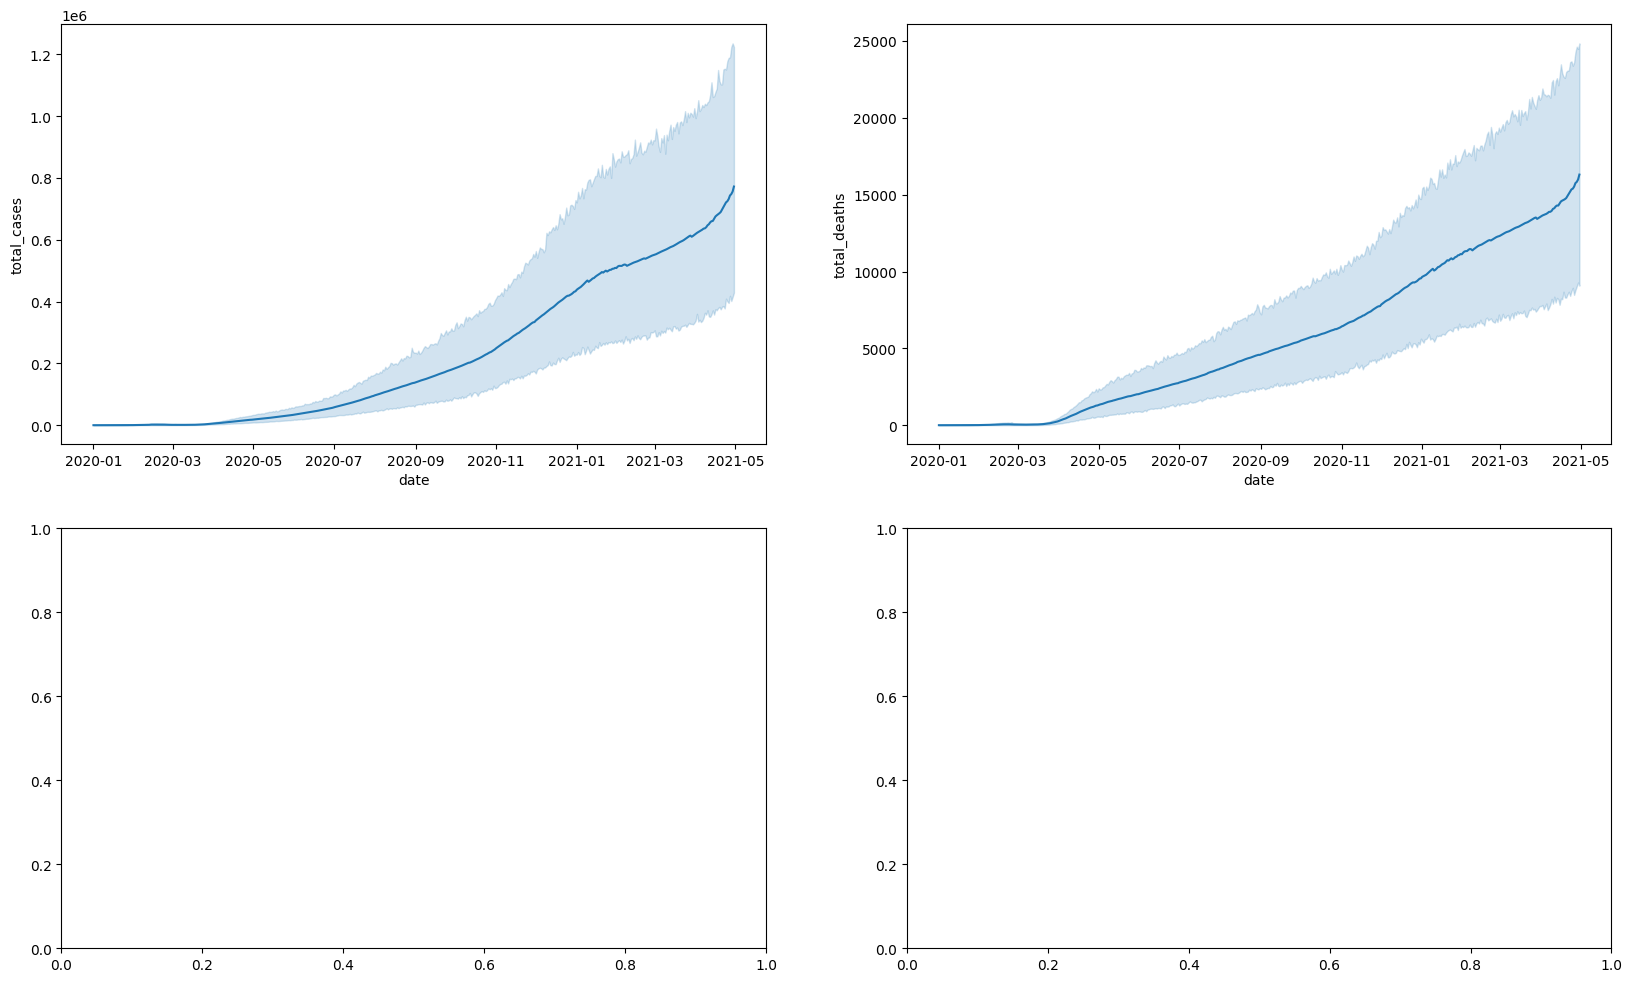

In [133]:
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

create_lineplots(df, 'total_cases', axes[0,0])
create_lineplots(df, 'total_deaths', axes[0,1])
 